# Analysis

In [163]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler



In [164]:
class CustomeOneHotEncoder:
    def __init__(self,drop=False):
        self.columns_ = None
        self.drop_ = drop
        self.encoder = OneHotEncoder()
        
    def fit(self,data,columns):
        self.columns_ = columns
        self.encoder.fit(data[self.columns_])
    
    def fit_transform(self,data,columns):
        self.fit(data,columns)
        return self.transform(data)
    
    def transform(self,data):
        feature_array = self.encoder.transform(data[self.columns_]).toarray()
        feature_label = self.encoder.categories_
        new_feature_label = []
        for x,y in zip(self.columns_,feature_label):
            new_feature_label.append([x+'_'+str(z) for z in y])

        final_feature_label= np.concatenate([x for x in new_feature_label])
        encoded_df = pd.DataFrame(feature_array,columns=final_feature_label,index = data.index)

        if self.drop_:
            cols_to_drop = [x[0] for x in new_feature_label]
            encoded_df = encoded_df.drop(cols_to_drop,axis=1)
        data = data.drop(self.columns_,axis=1)   
        #return encoded_df
        return pd.concat([data,encoded_df],axis=1)
    


# Linear Regression

In [165]:
pd.options.display.max_rows=None

In [166]:
data = pd.read_csv('train_1.csv')

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Members,Title,Cabin_Codes,Age_Group,Multiply,fare_per_person
0,1,0,3,male,22.0,1,0,7.2500,S,1,Mr,No_Cabin,3,66.0,3.62500
1,2,1,1,female,38.0,1,0,71.2833,C,1,Mr,C,3,38.0,35.64165
2,3,1,3,female,26.0,0,0,7.9250,S,0,Miss,No_Cabin,3,78.0,7.92500
3,4,1,1,female,35.0,1,0,53.1000,S,1,Mr,C,3,35.0,26.55000
4,5,0,3,male,35.0,0,0,8.0500,S,0,Mr,No_Cabin,3,105.0,8.05000


In [167]:
data = data.sample(frac=1)

**For Getting equal no of classes**

In [168]:

"""
temp = data[(data['Survived'] == 0) ].iloc[:342,:]
temp2 = data[(data['Survived'] == 1) ]data.head()
data = pd.concat([temp,temp2]).sort_values(by='PassengerId')
data.head()
"""

"\ntemp = data[(data['Survived'] == 0) ].iloc[:342,:]\ntemp2 = data[(data['Survived'] == 1) ]data.head()\ndata = pd.concat([temp,temp2]).sort_values(by='PassengerId')\ndata.head()\n"

In [169]:

dataset = data.copy()


## Train And test Dataset

In [170]:
y = dataset['Survived']
print('All Columns : {}'.format(dataset.columns.values))
#cols_to_drop = ['Survived','PassengerId']
cols_to_drop = ['Survived','PassengerId','SibSp',  'Total_Members','Age','Age_Group']
cols_to_inc = list(set(dataset.columns) - set(cols_to_drop))
print(' Dropped Columns : {}'.format(cols_to_drop))

x = dataset.drop(cols_to_drop,axis=1)

#cat_columns = ['Age_Group','Cabin_Codes','Sex','Pclass','Title','Embarked']
cat_columns = ['Cabin_Codes','Sex','Pclass','Title','Embarked']
num_columns = list(set(x.columns)- set(cat_columns))
print('Cateogrical Columns : {} \n Numerical Columns : {}'.format(cat_columns,num_columns))
x.head()

All Columns : ['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked' 'Total_Members' 'Title' 'Cabin_Codes' 'Age_Group' 'Multiply'
 'fare_per_person']
 Dropped Columns : ['Survived', 'PassengerId', 'SibSp', 'Total_Members', 'Age', 'Age_Group']
Cateogrical Columns : ['Cabin_Codes', 'Sex', 'Pclass', 'Title', 'Embarked'] 
 Numerical Columns : ['Parch', 'Multiply', 'Fare', 'fare_per_person']


,Pclass,Sex,Parch,Fare,Embarked,Title,Cabin_Codes,Multiply,fare_per_person
514,3,male,0,7.4958,S,Mr,No_Cabin,72.0,7.495800
858,3,female,3,19.2583,C,Mr,No_Cabin,72.0,4.814575
852,3,female,1,15.2458,C,Miss,No_Cabin,27.0,5.081933
547,2,male,0,13.8625,C,Mr,No_Cabin,60.0,13.862500
109,3,female,0,24.1500,Q,Miss,No_Cabin,66.0,12.075000


In [171]:
encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=cat_columns)
x.head()

,Parch,Fare,Multiply,fare_per_person,Cabin_Codes_B,Cabin_Codes_C,Cabin_Codes_D,Cabin_Codes_E,Cabin_Codes_F,Cabin_Codes_G,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
514,0,7.4958,72.0,7.495800,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
858,3,19.2583,72.0,4.814575,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
852,1,15.2458,27.0,5.081933,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,0,13.8625,60.0,13.862500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
109,0,24.1500,66.0,12.075000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [172]:
scaler = StandardScaler()
x[num_columns] = scaler.fit_transform(x[num_columns])
x.head()

,Parch,Fare,Multiply,fare_per_person,Cabin_Codes_B,Cabin_Codes_C,Cabin_Codes_D,Cabin_Codes_E,Cabin_Codes_F,Cabin_Codes_G,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
514,-0.473674,-0.497496,0.308295,-0.346739,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
858,3.250237,-0.260662,0.308295,-0.421589,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
852,0.767630,-0.341452,-1.132197,-0.414125,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,-0.473674,-0.369305,-0.075836,-0.169003,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
109,-0.473674,-0.162169,0.116230,-0.218904,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [175]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,shuffle=True,random_state=1)

x_train.shape,x_test.shape


print('Test Shape : {} , Train Shape {}'.format(x_test.shape,x_train.shape))

Test Shape : (179, 31) , Train Shape (712, 31)


# Modelling

In [176]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

**Sklearn Decision Tree**

In [196]:

model = DecisionTreeClassifier(criterion='gini',max_depth=3)
model = model.fit(x_train,y_train)
#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))

#print('Train Accuracy:' ,metrics.accuracy_score(y_train, res.predict(x_train)))
#print('Test Accuracy:' ,metrics.accuracy_score(y_test, res.predict(x_test)))


In [197]:
accuracy_score(y_train,model.predict(x_train))

0.8230337078651685

In [198]:
print('Train Accuracy:', accuracy_score(y_train,model.predict(x_train)))
print('Test Accuracy:', accuracy_score(y_test,model.predict(x_test)))

Train Accuracy: 0.8230337078651685
Test Accuracy: 0.8491620111731844


In [199]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,f1_score,roc_auc_score

In [200]:
print('Accuracy  : %.2f'%accuracy_score(y_test,model.predict(x_test)))
print('Precision : %.2f'%precision_score(y_test,model.predict(x_test)))
print('Recall : %.2f'%recall_score(y_test,model.predict(x_test)))
print('F1 Score : %.2f'%f1_score(y_test,model.predict(x_test)))

Accuracy  : 0.85
Precision : 0.84
Recall : 0.83
F1 Score : 0.83


In [201]:
fpr,tpr,threshold = roc_curve(y_test,model.predict(x_test))

[Text(0, 0.5, 'True Positive Rate'), Text(0.5, 0, 'False Positive Rate')]

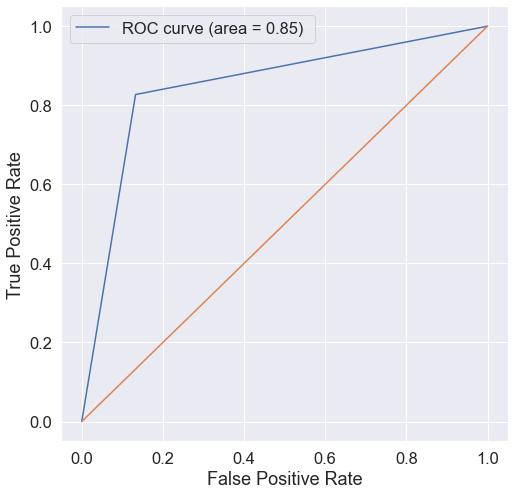

In [202]:

sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5)
area = roc_auc_score(y_test,model.predict(x_test))
fig =sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(2)))
sns.lineplot([0,1],[0,1],markers='--')
fig.set(xlabel='False Positive Rate',ylabel='True Positive Rate')

**KFold Validation**

In [203]:
from sklearn.model_selection import KFold,cross_validate

In [185]:
cv = KFold(6,True,1)

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [186]:
#model = LogisticRegression()

In [187]:
for train,test in cv.split(x):
    model.fit(x.iloc[train],y.iloc[train])
    print('Train acc :',model.score(x.iloc[train],y.iloc[train]))
    print('Test acc :',model.score(x.iloc[test],y.iloc[test]))

Train acc : 0.9851752021563343
Test acc : 0.785234899328859
Train acc : 0.9878706199460916
Test acc : 0.7516778523489933
Train acc : 0.9865229110512129
Test acc : 0.7651006711409396
Train acc : 0.9892328398384926
Test acc : 0.8175675675675675
Train acc : 0.990578734858681
Test acc : 0.7297297297297297
Train acc : 0.9865410497981157
Test acc : 0.8243243243243243


### Cross Validation

In [188]:
cv_score = cross_validate(model,x,y,cv=5,scoring='accuracy')['test_score']

In [189]:
print("CV Score : Mean : %.7g | Std : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

CV Score : Mean : 0.7676982 | Std : 0.02555291 | Min : 0.7303371 | Max : 0.7977528


In [190]:
print("CV Score : Mean : %.7g | Std : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

CV Score : Mean : 0.7676982 | Std : 0.02555291 | Min : 0.7303371 | Max : 0.7977528


### Grid Search, Randomized Search

In [191]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [192]:
parameters = {'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}


In [193]:
cv_model = GridSearchCV(model,parameters,verbose=1,cv=6,scoring='accuracy')
cv_model.fit(x,y)


Fitting 6 folds for each of 30 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.7s finished


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             scoring='accuracy', verbose=1)

In [194]:
cv_model.best_params_,cv_model.best_score_

({'criterion': 'gini', 'max_depth': 3}, 0.8114834633291009)

### Randomized Search

In [289]:
from sklearn.model_selection import RandomizedSearchCV

In [290]:
from scipy.stats import uniform
C = uniform(0,1000)
parameters = {'C':C,'max_iter': [100, 150, 200, 500, 1000]}


In [291]:
cv_model = RandomizedSearchCV(model,parameters,cv=7,scoring='accuracy')
cv_model.fit(x,y)


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

RandomizedSearchCV(cv=7, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CC527794C8>,
                                        'max_iter': [100, 150, 200, 500, 1000]},
                   scoring='accuracy')

In [292]:
cv_model.best_params_,cv_model.best_score_

({'C': 657.8947124752119, 'max_iter': 1000}, 0.821630694600675)

In [241]:
export_graphviz(model,'tree.dot',feature_names=x_train.columns.values)

## Create Submission

In [204]:
test_data = pd.read_csv('test_1.csv')
test_data = test_data.sample(frac=1)
passenger_id = test_data.PassengerId
test_data = test_data.drop(cols_to_drop[1:],axis=1)
test_data.head()

,Pclass,Sex,Parch,Fare,Embarked,Cabin_Codes,Title,Multiply,fare_per_person
107,3,male,0,7.750,Q,No_Cabin,Mr,72.0,7.750000
176,2,female,0,36.750,S,No_Cabin,Miss,40.0,36.750000
165,3,female,1,22.025,S,No_Cabin,Mr,78.0,7.341667
247,2,male,1,32.500,S,No_Cabin,Mr,84.0,10.833333
143,2,male,0,26.000,S,No_Cabin,Mr,56.0,26.000000


In [205]:
test_data = encoder.transform(test_data)
test_data.head()

,Parch,Fare,Multiply,fare_per_person,Cabin_Codes_B,Cabin_Codes_C,Cabin_Codes_D,Cabin_Codes_E,Cabin_Codes_F,Cabin_Codes_G,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
107,0,7.750,72.0,7.750000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
176,0,36.750,40.0,36.750000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
165,1,22.025,78.0,7.341667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
247,1,32.500,84.0,10.833333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
143,0,26.000,56.0,26.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [206]:
test_data[num_columns] = scaler.fit_transform(test_data[num_columns])
#test_data = test_data.iloc[:,1:]
test_data.head()

,Parch,Fare,Multiply,fare_per_person,Cabin_Codes_B,Cabin_Codes_C,Cabin_Codes_D,Cabin_Codes_E,Cabin_Codes_F,Cabin_Codes_G,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
107,-0.400248,-0.498491,0.434699,-0.394278,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
176,-0.400248,0.021315,-0.776934,0.421224,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
165,0.619896,-0.242621,0.661880,-0.405761,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
247,0.619896,-0.054864,0.889061,-0.307573,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
143,-0.400248,-0.171372,-0.171118,0.118926,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [207]:
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': model.predict(test_data)
                        })
result = result.sort_values(by='PassengerId')

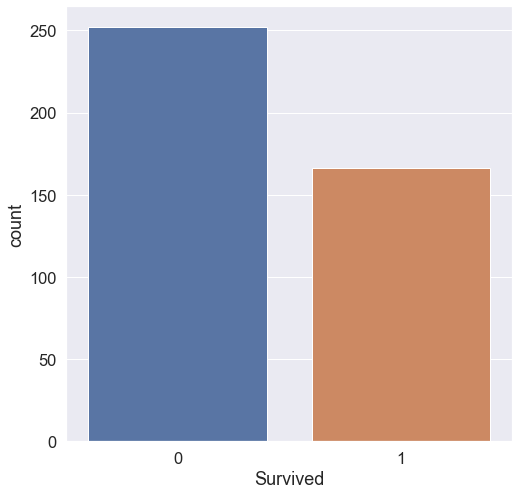

In [208]:
sns.countplot(result['Survived'])

In [209]:
result.shape

(418, 2)

In [210]:
result.to_csv('Prediction_21.csv',index=False)